<a href="https://colab.research.google.com/github/Shrinandmat/Heart-Stroke-Prediction/blob/main/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, f1_score, mean_squared_error, log_loss

In [17]:
df = pd.read_csv('/healthcare-dataset-stroke-data.csv')

In [18]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1


In [19]:
df.drop('id', axis=1, inplace=True)
df['age'] = df['age'].astype(int)
df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

In [20]:
df['ever_married'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['gender'].replace({'Male': 1, 'Female': 0, 'Other': 2}, inplace=True)
df['Residence_type'].replace({'Urban': 1, 'Rural': 0}, inplace=True)
df['smoking_status'].replace({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}, inplace=True)
df['work_type'].replace({'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4}, inplace=True)

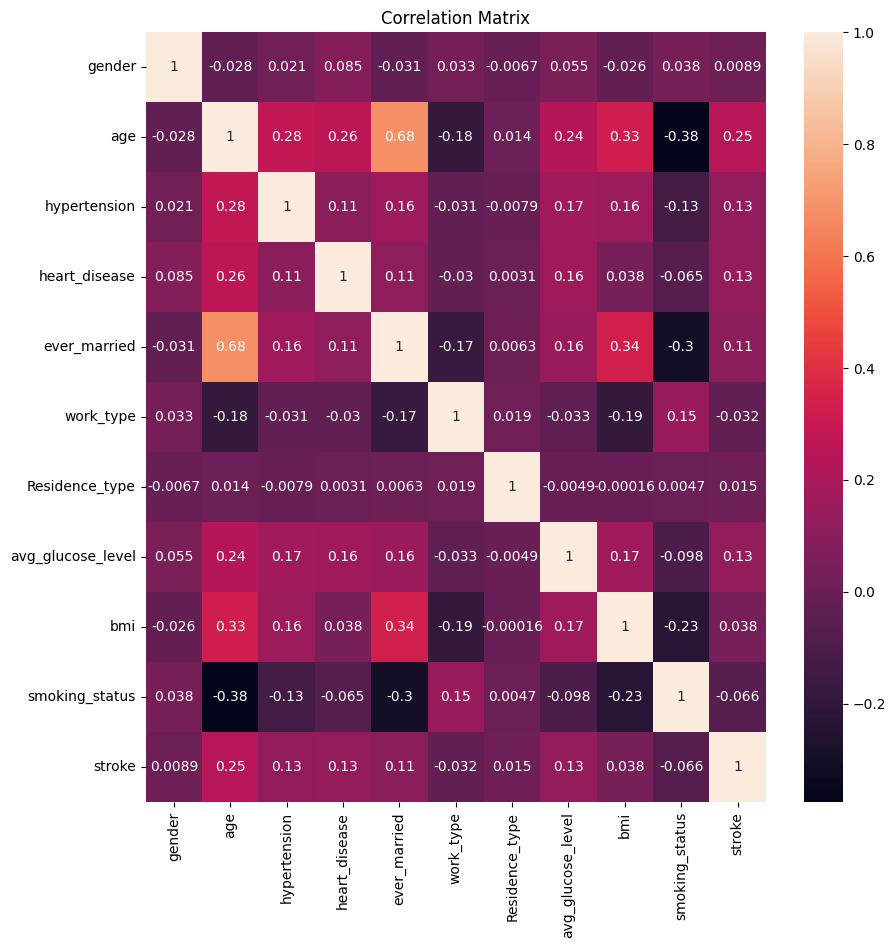

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

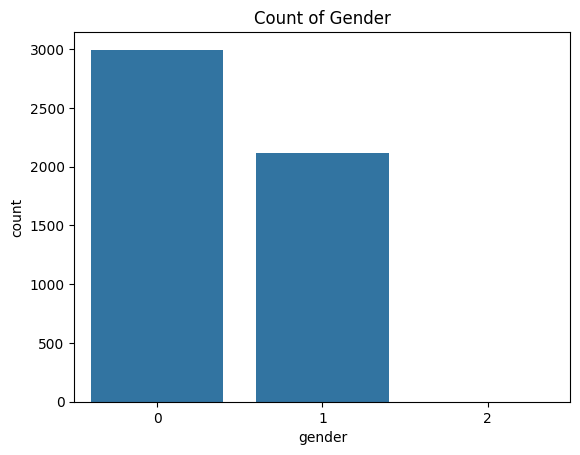

In [22]:
sns.countplot(x='gender', data=df)
plt.title('Count of Gender')
plt.show()

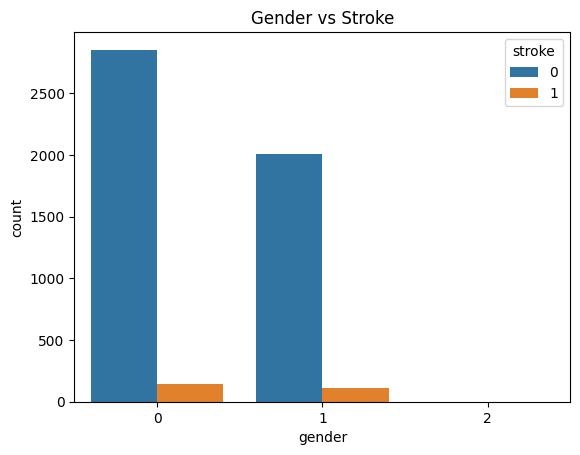

In [23]:
sns.countplot(x='gender', data=df, hue='stroke')
plt.title('Gender vs Stroke')
plt.show()

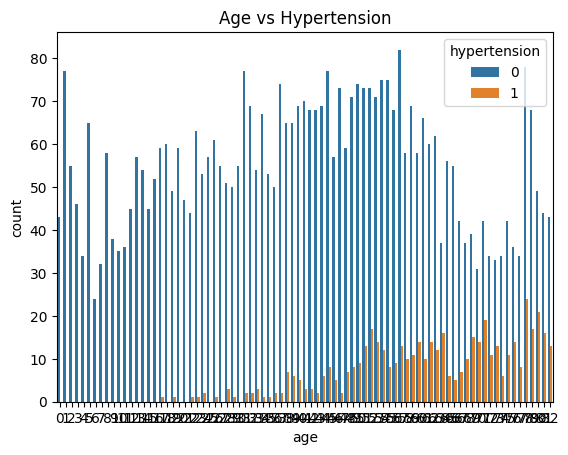

In [24]:
sns.countplot(x='age', data=df, hue='hypertension')
plt.title('Age vs Hypertension')
plt.show()

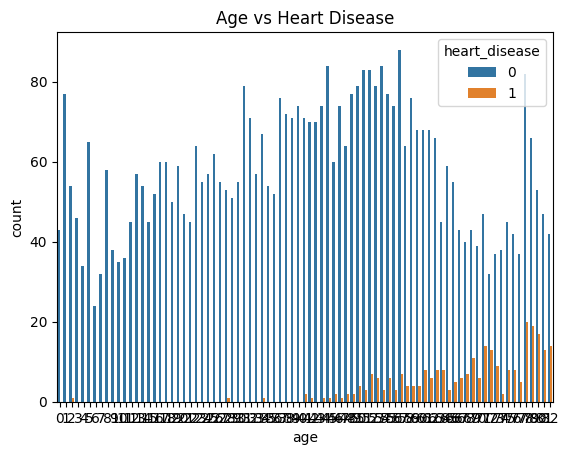

In [25]:
sns.countplot(x='age', data=df, hue='heart_disease')
plt.title('Age vs Heart Disease')
plt.show()

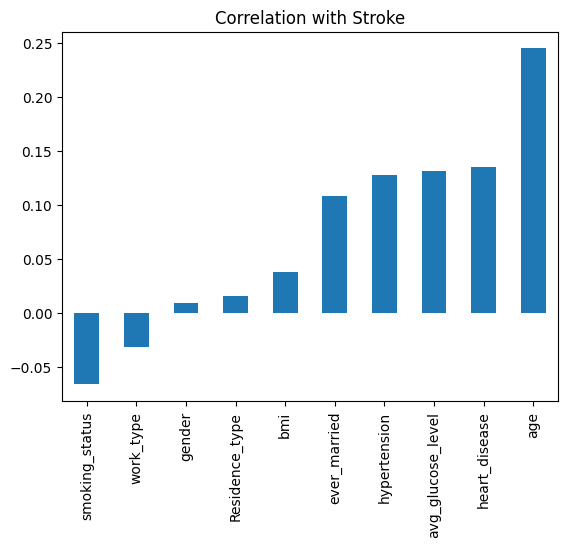

In [26]:
df.corr()['stroke'][:-1].sort_values().plot(kind='bar')
plt.title('Correlation with Stroke')
plt.show()

In [27]:
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Logistic Regression Model Accuracy Score:', accuracy_score(y_test, lr_pred))
print('Logistic Regression Model F1 Score:', f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('Logistic Regression Model Log Loss:', log_loss(y_test, lr_pred))

Logistic Regression Model Accuracy Score: 0.9393346379647749
Logistic Regression Model F1 Score: 0.0
Logistic Regression Model Mean Absolute Error: 0.060665362035225046
Logistic Regression Model Mean Squared Error: 0.060665362035225046
Logistic Regression Model Log Loss: 2.1866012819229588


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print(X_train.dtypes)
dt = DecisionTreeClassifier(random_state=42)



gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
dtype: object


In [34]:
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('Decision Tree Model Accuracy Score:', accuracy_score(y_test, dt_pred))
print('Decision Tree Model F1 Score:', f1_score(y_test, dt_pred))
print('Decision Tree Model Mean Absolute Error:', mean_absolute_error(y_test, dt_pred))
print('Decision Tree Model Mean Squared Error:', mean_squared_error(y_test, dt_pred))
print('Decision Tree Model Log Loss:', log_loss(y_test, dt_pred))

Decision Tree Model Accuracy Score: 0.910958904109589
Decision Tree Model F1 Score: 0.19469026548672566
Decision Tree Model Mean Absolute Error: 0.08904109589041095
Decision Tree Model Mean Squared Error: 0.08904109589041095
Decision Tree Model Log Loss: 3.2093663976611166


In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
print('Decision Tree Model Mean Absolute Error:', mean_absolute_error(y_test, dt_pred))
print('Decision Tree Model Mean Squared Error:', mean_squared_error(y_test, dt_pred))
print('Decision Tree Model Log Loss:', log_loss(y_test, dt_pred))

Decision Tree Model Mean Absolute Error: 0.08904109589041095
Decision Tree Model Mean Squared Error: 0.08904109589041095
Decision Tree Model Log Loss: 3.2093663976611166


In [37]:
sv = SVC(probability=True)  # Enable probability estimates for log_loss calculation
sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)
sv_pred_proba = sv.predict_proba(X_test)

In [38]:
print('SVM Model Accuracy Score:', accuracy_score(y_test, sv_pred))
print('SVM Model F1 Score:', f1_score(y_test, sv_pred))
print('SVM Model Mean Absolute Error:', mean_absolute_error(y_test, sv_pred))
print('SVM Model Mean Squared Error:', mean_squared_error(y_test, sv_pred))
print('SVM Model Log Loss:', log_loss(y_test, sv_pred_proba))

SVM Model Accuracy Score: 0.9393346379647749
SVM Model F1 Score: 0.0
SVM Model Mean Absolute Error: 0.060665362035225046
SVM Model Mean Squared Error: 0.060665362035225046
SVM Model Log Loss: 0.2244781894913113


In [40]:
from sklearn.metrics import confusion_matrix


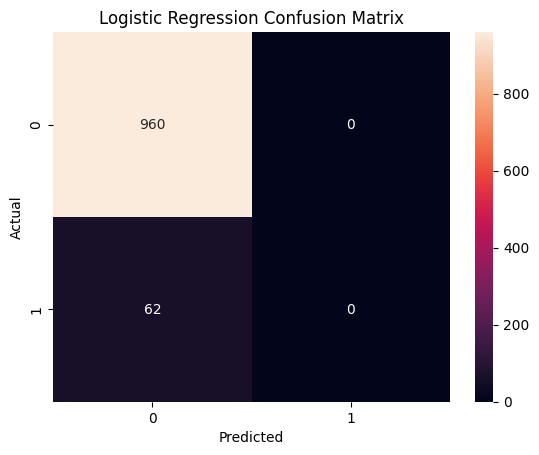

In [41]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

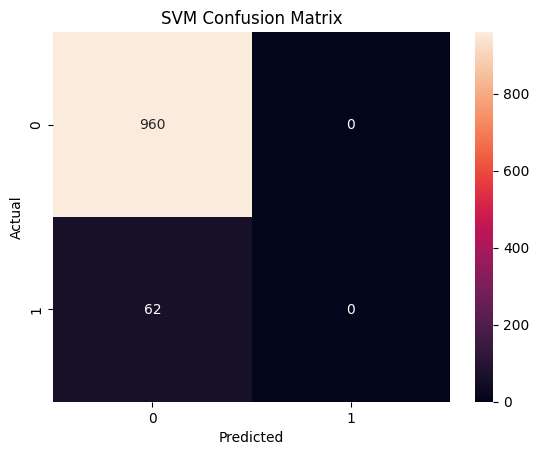

In [42]:
sns.heatmap(confusion_matrix(y_test, sv_pred), annot=True, fmt='d')
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

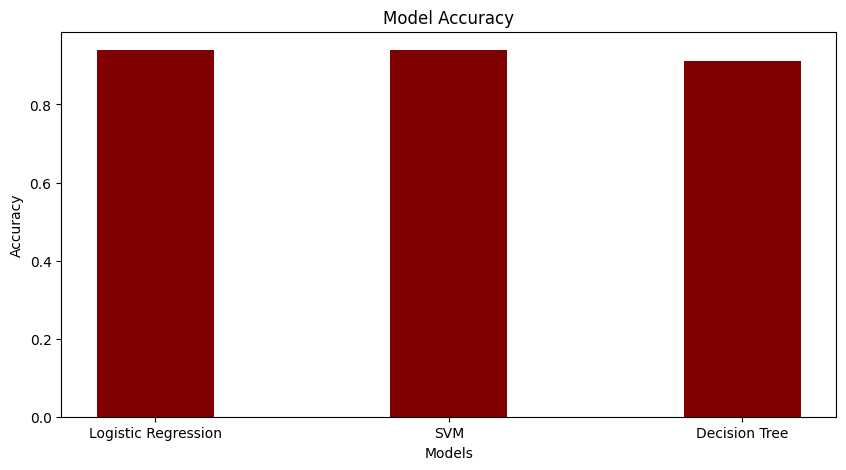

In [43]:
models = ['Logistic Regression', 'SVM', 'Decision Tree']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, sv_pred), accuracy_score(y_test, dt_pred)]
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color='Maroon', width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [50]:
print(X.columns)
print(len(X.columns))


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
10


In [51]:
# Example input data matching the 10 features
input_data = (1, 62, 0, 0, 1, 0, 1, 140, 268, 0)  # Modify values as appropriate

# Create DataFrame for prediction
input_data_df = pd.DataFrame([input_data], columns=X.columns)

# Make prediction using the Decision Tree model
prediction = dt.predict(input_data_df)
prediction_proba = dt.predict_proba(input_data_df)

# Display results
print("Input Data:")
for col, value in zip(X.columns, input_data):
    print(f"{col}: {value}")

print("\nPrediction Result:")
if prediction[0] == 0:
    print('The Person does not have a Stroke')
else:
    print('The Person has a Stroke')

print("\nPrediction Probabilities:")
print(f"Probability of No Stroke: {prediction_proba[0][0]:.2f}")
print(f"Probability of Stroke: {prediction_proba[0][1]:.2f}")


Input Data:
gender: 1
age: 62
hypertension: 0
heart_disease: 0
ever_married: 1
work_type: 0
Residence_type: 1
avg_glucose_level: 140
bmi: 268
smoking_status: 0

Prediction Result:
The Person does not have a Stroke

Prediction Probabilities:
Probability of No Stroke: 1.00
Probability of Stroke: 0.00
